**step-by-step** — assuming you don’t know any programming — I’ll explain it like I would to someone totally new.
This is a typical **computer vision** task: comparing two pictures to find **matching points** (like matching faces, objects, logos, etc.).

---

### 💻 What does this code do overall?

👉 It compares **two images** and finds “interesting points” that appear in both images (for example, a nose on two photos of a face, or the corner of a building in two photos). Then it draws lines between the matching points.

---

### Now let’s go piece by piece:

---

### **Step 1: Import Libraries**

```python
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
```

* 🟢 **`import cv2`** — Brings in **OpenCV** → this is a famous library for working with images.
* 🟢 **`import numpy as np`** — Brings in a library called **numpy** → helps with numbers and data (images are numbers inside the computer!).
* 🟢 **`from google.colab.patches import cv2_imshow`** → this helps show images inside **Google Colab** (which is a tool to run code in your browser).

---

### **Step 2: Load your images**

```python
img1_path = '/content/LECTURER 1.jpeg'
img2_path = '/content/LECTURER 2.jpeg'

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
```

* **What’s happening?**

  * The computer will **load two images** called “LECTURER 1” and “LECTURER 2”.
  * It will turn them into **black & white** (this is called "grayscale") — because finding matching points is easier this way.

---

### **Step 3: Check if the images loaded correctly**

```python
if img1 is None:
    raise FileNotFoundError(f"Image not found at {img1_path}")
if img2 is None:
    raise FileNotFoundError(f"Image not found at {img2_path}")
```

* **What’s happening?**

  * The computer **checks if it found the image files** — if not, it will stop and give an error.

---

### **Step 4: Initialize the SIFT detector**

```python
sift = cv2.SIFT_create()
```

* **What is SIFT?**

  * SIFT stands for **Scale-Invariant Feature Transform**.
  * Fancy words... but what does it do?
  * 🟢 It finds **important points** in an image — like corners, edges — points that are likely to be the same even if the image is rotated or zoomed.

---

### **Step 5: Detect keypoints and compute descriptors**

```python
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
```

* **What’s happening?**

  * It runs the **SIFT detector** on both images.
  * The computer finds:

    * 🟢 **Keypoints** — interesting points (corners, shapes).
    * 🟢 **Descriptors** — a kind of “fingerprint” that describes each keypoint.
  * Now, the computer has a “list of fingerprints” for each image.

---

### **Step 6: Match descriptors using Brute-Force (BF) Matcher**

```python
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
```

* **What is this?**

  * 🟢 “Brute-force” means the computer will compare **every fingerprint in image 1** with **every fingerprint in image 2**.
  * **`k=2`** means → for each point, it finds the 2 closest matches.
  * Now the computer knows which points in image 1 are “similar” to which points in image 2.

---

### **Step 7: Apply Lowe’s Ratio Test**

```python
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])
```

* **What is this?**

  * This is a **filter**.
  * It makes sure we keep only the **very good matches** — where the best match is much better than the 2nd-best.
  * Why? To avoid false matches — we only want points that really match between images.

---

### **Step 8: Draw the good matches**

```python
result_image_bf = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
```

* **What is this doing?**

  * It **draws a new image**:

    * On the left → image 1
    * On the right → image 2
    * With **lines connecting the matching points** between them.

---

### **Step 9: Display the result**

```python
print("Displaying SIFT + Brute-Force Matches:")
cv2_imshow(result_image_bf)
```

* **What’s happening?**

  * It **prints a message** so you know what’s being shown.
  * It **displays the image** with the matching lines.

---

### 💡 **Summary in simple words**:

1. Load two images.
2. Find important points in both images (like corners, edges).
3. For each important point, calculate a “fingerprint.”
4. Compare all fingerprints → find matching points between the two images.
5. Draw lines between matching points → show result.

---

### 🚀 **Why is this useful?**

* You can use this for:

  * **Face matching**.
  * **Object recognition**.
  * **Matching scenes in two photos**.
  * **Tracking objects in videos**.
  * **Building augmented reality apps**!

---



Displaying SIFT + Brute-Force Matches:


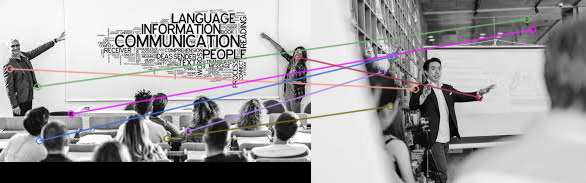

In [8]:
# Cell 1: SIFT with Brute-Force Matching

# Step 1: Install OpenCV's non-free algorithms if needed (SIFT is now free, but this is good practice)
# No installation needed for SIFT in recent OpenCV versions.

import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Use this for displaying images in Colab

# Step 2: Load your images from the Colab file system
# Make sure you have uploaded these files to your Colab session.
img1_path = '/content/LECTURER 1.jpeg'
img2_path = '/content/LECTURER 2.jpeg'

# Load images in grayscale, which is standard for many feature detectors
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# --- Check if images loaded correctly ---
if img1 is None:
    raise FileNotFoundError(f"Image not found at {img1_path}. Please upload the file.")
if img2 is None:
    raise FileNotFoundError(f"Image not found at {img2_path}. Please upload the file.")

# Step 3: Initialize the SIFT detector
sift = cv2.SIFT_create()

# Step 4: Detect keypoints and compute descriptors
# A keypoint is an interesting point in the image, and a descriptor is its unique signature.
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Step 5: Match descriptors using a Brute-Force (BF) Matcher
# The BF Matcher compares every descriptor from img1 with every descriptor from img2.
bf = cv2.BFMatcher()
# knnMatch finds the 2 best matches for each descriptor.
matches = bf.knnMatch(des1, des2, k=2)

# Step 6: Apply Lowe's Ratio Test to filter for good matches
# This test ensures that the best match is significantly better than the second-best match.
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

# Step 7: Draw the good matches
# This creates a new image showing img1 and img2 side-by-side with lines connecting the matches.
result_image_bf = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Step 8: Display the result in Colab
print("Displaying SIFT + Brute-Force Matches:")
cv2_imshow(result_image_bf)


Displaying SIFT + FLANN Matches:


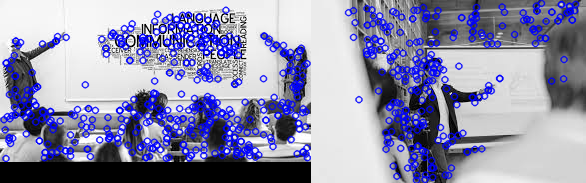

In [9]:
# Cell 2: SIFT with FLANN Matching

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# --- We can reuse the images, keypoints, and descriptors from the previous cell ---
# If running this cell independently, uncomment the following lines:
# img1_path = '/content/LECTURER 1.jpeg'
# img2_path = '/content/LECTURER 2.jpeg'
# img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
# img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
# sift = cv2.SIFT_create()
# kp1, des1 = sift.detectAndCompute(img1, None)
# kp2, des2 = sift.detectAndCompute(img2, None)
# --------------------------------------------------------------------------

# Step 1: Configure FLANN matcher parameters
# For SIFT descriptors, the KD-Tree algorithm is a good choice.
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # 'checks' is for accuracy vs. speed trade-off

# Step 2: Create and use the FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# FLANN requires descriptors to be of type float32
des1 = np.float32(des1)
des2 = np.float32(des2)

matches = flann.knnMatch(des1, des2, k=2)

# Step 3: Filter good matches using a mask and Lowe's Ratio Test
# The matchesMask allows us to draw only the inliers (good matches).
matchesMask = [[0, 0] for i in range(len(matches))]

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0] # Mark this as a good match

# Step 4: Define drawing parameters and visualize the matches
draw_params = dict(
    matchColor=(0, 255, 0),       # Green lines for matches
    singlePointColor=(255, 0, 0), # Red for single points (not drawn due to mask)
    matchesMask=matchesMask,      # Apply the mask
    flags=cv2.DrawMatchesFlags_DEFAULT,
)

result_image_flann = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Step 5: Display the result in Colab
print("\nDisplaying SIFT + FLANN Matches:")
cv2_imshow(result_image_flann)



---

### 📜 **Title**:

You are doing "SIFT with Brute-Force Matching" —
Goal: **find what parts of two images match**.

---

### 🛠️ **Step 1: Install OpenCV’s algorithms**

```python
# No installation needed for SIFT in recent OpenCV versions.
```

✅ No need to do anything special — modern OpenCV already includes SIFT now.

---

### 🚀 **Import the required tools**

```python
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
```

👉 **What is happening here?**

You are telling Python:

✅ I want to use OpenCV → for **image processing**
✅ I want to use numpy → for **numbers and matrices**
✅ I want a helper (cv2\_imshow) → to **show images inside Google Colab**

---

### 🖼️ **Step 2: Load your images**

```python
img1_path = '/content/LECTURER 1.jpeg'
img2_path = '/content/LECTURER 2.jpeg'
```

👉 **What is happening?**
You tell Python **where your two images are** — here: 2 lecturer images in the Colab folder.

---

```python
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
```

👉 **What is happening?**
You tell OpenCV: **"Load these images in black & white (grayscale)."**

Why grayscale?
➡️ SIFT only cares about the **structure of the image (shapes, edges)** — not about color.

---

```python
if img1 is None:
    raise FileNotFoundError(f"Image not found at {img1_path}. Please upload the file.")
if img2 is None:
    raise FileNotFoundError(f"Image not found at {img2_path}. Please upload the file.")
```

👉 **What is happening?**
A safety check: if images not found → tell you to upload them again.
(helps avoid bugs if you forget to upload images).

---

### 🔍 **Step 3: Initialize the SIFT detector**

```python
sift = cv2.SIFT_create()
```

👉 **What is SIFT?**
**SIFT** = *Scale Invariant Feature Transform*.
It finds "interesting points" in an image (called **keypoints**) — no matter what size or rotation.

Think of it as an **AI eye** scanning the image for **corners, edges, textures**.

---

### 🖊️ **Step 4: Detect keypoints and compute descriptors**

```python
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
```

👉 **What is happening?**
For both images:

* **kp1** and **kp2** = list of interesting points found (like "this corner, this edge")
* **des1** and **des2** = special "signatures" for each keypoint
  (like a fingerprint for each feature)

**Goal:** describe each image so you can compare them later.

---

### 🔗 **Step 5: Brute-Force Match**

```python
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
```

👉 **What is happening?**
Now you compare the fingerprints (descriptors) between images:

➡️ The **Brute-Force Matcher** tries to match **every point in image 1** with **every point in image 2**.

**knnMatch** → asks: for each point in img1, "what are your top 2 best matches in img2?"

---

### ⚖️ **Step 6: Lowe’s Ratio Test**

```python
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])
```

👉 **What is happening?**

Not all matches are good — some are random.
So Lowe’s Ratio Test filters them:

* If the **best match** is much better than the 2nd best → accept it.
* If it’s a close race → reject it (probably noise).

End result: **only the strong matches survive** → stored in **good\_matches**.

---

### 🎨 **Step 7: Draw the matches**

```python
result_image_bf = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
```

👉 **What is happening?**

You create a new image:

✅ img1 and img2 side-by-side
✅ Lines connecting the matched keypoints
✅ You can **see** what the model thinks are matching parts

---

### 🖥️ **Step 8: Display the result**

```python
print("Displaying SIFT + Brute-Force Matches:")
cv2_imshow(result_image_bf)
```

👉 **What is happening?**

Finally, you tell Google Colab:
✅ "Please show me this image!"

---

### 🌟 **Summary (no programming required):**

1️⃣ Load your two images → convert to grayscale
2️⃣ Tell SIFT to find "interesting points"
3️⃣ Compare those points between images
4️⃣ Filter out weak matches
5️⃣ Draw the good matches for you to see!

---

### ⚡ Example: What does the result look like?

| Left Image                                                              | Right Image |
| ----------------------------------------------------------------------- | ----------- |
| Corners, edges, patterns — connected with **green lines** if they match |             |

---



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00


Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /root/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100%|██████████| 44.2M/44.2M [00:04<00:00, 11.5MB/s]


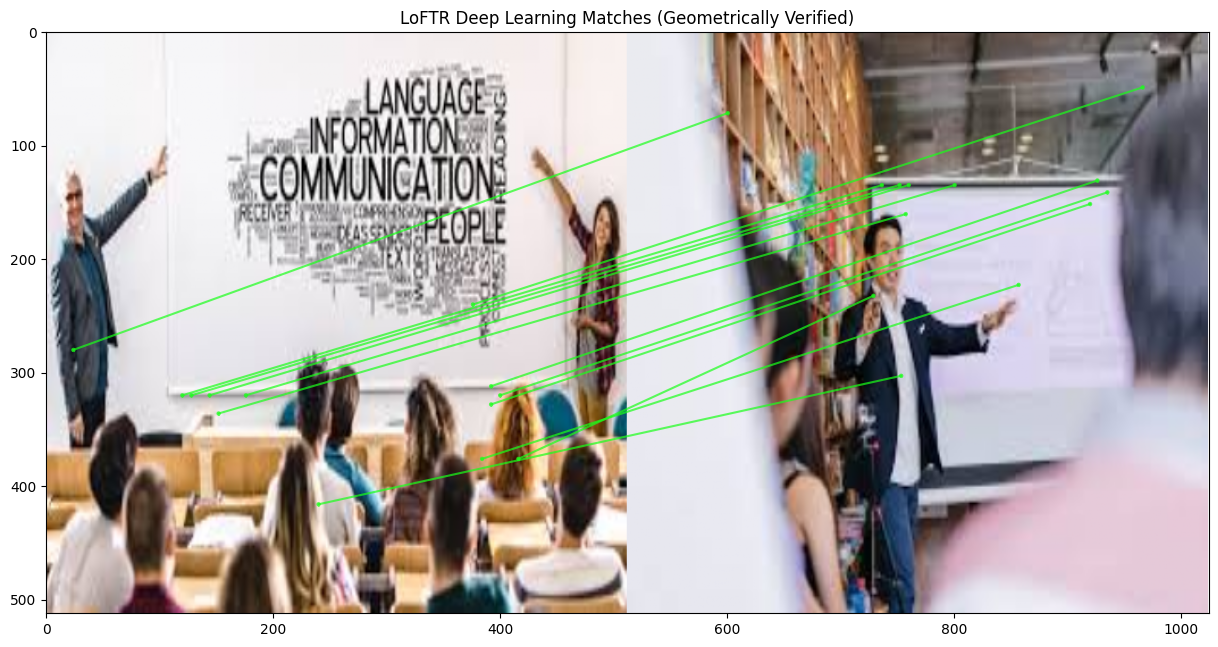

In [10]:
# Cell 3: Deep Learning with Kornia LoFTR

# Step 1: Install required libraries
!pip install kornia kornia_moons opencv-python --upgrade -q

import cv2
import kornia as K
import kornia.feature as KF
import torch
import matplotlib.pyplot as plt
from kornia_moons.viz import draw_LAF_matches

# Step 2: Load images using Kornia and preprocess them
# Kornia handles the conversion to PyTorch Tensors, required for deep learning models.
img1_path = '/content/LECTURER 1.jpeg'
img2_path = '/content/LECTURER 2.jpeg'

# Load images as RGB tensors with shape [Batch, Channels, Height, Width]
img1_tensor = K.io.load_image(img1_path, K.io.ImageLoadType.RGB32)[None, ...]
img2_tensor = K.io.load_image(img2_path, K.io.ImageLoadType.RGB32)[None, ...]

# LoFTR works best on images of a fixed size, so we resize them.
img1_resized = K.geometry.resize(img1_tensor, (512, 512), antialias=True)
img2_resized = K.geometry.resize(img2_tensor, (512, 512), antialias=True)

# Step 3: Initialize the pre-trained LoFTR model
matcher = KF.LoFTR(pretrained='outdoor') # 'outdoor' model is robust for general use

# Step 4: Prepare input and find correspondences
# LoFTR needs grayscale images. The input is a dictionary.
input_dict = {
    "image0": K.color.rgb_to_grayscale(img1_resized),
    "image1": K.color.rgb_to_grayscale(img2_resized),
}

# Run the model in inference mode for better performance
with torch.inference_mode():
    correspondences = matcher(input_dict)

# Step 5: Extract matching keypoints and filter them
# We get the pixel coordinates of the matching points.
mkpts0 = correspondences['keypoints0'].cpu().numpy()
mkpts1 = correspondences['keypoints1'].cpu().numpy()

# To get only the highest quality matches, we use findFundamentalMat.
# This finds matches that are geometrically consistent between the two camera views.
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
inliers = inliers > 0 # Convert the inlier mask to a boolean array

# Step 6: Visualize the LoFTR matches
# The visualization function from kornia_moons is powerful but needs specific inputs.
# We create dummy "Local Affine Frames" (LAFs) from our keypoints.
laf0 = KF.laf_from_center_scale_ori(torch.from_numpy(mkpts0).view(1, -1, 2))
laf1 = KF.laf_from_center_scale_ori(torch.from_numpy(mkpts1).view(1, -1, 2))

# Use matplotlib to display the result in Colab
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
draw_LAF_matches(
    laf0,
    laf1,
    torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2), # Indices to connect points
    K.tensor_to_image(img1_resized),
    K.tensor_to_image(img2_resized),
    inliers, # This mask ensures only geometrically correct matches are drawn
    ax=ax,
    draw_dict={
        'inlier_color': (0.1, 1, 0.1, 0.7), # Green for inliers
        'tentative_color': None, # Don't draw outliers
        'feature_color': None,   # Don't draw keypoint circles
    },
)
ax.set_title("LoFTR Deep Learning Matches (Geometrically Verified)")
plt.show()



---

### 📦 Cell 1: Install required libraries

```python
!pip install kornia kornia_moons opencv-python --upgrade -q
```

👉 **What it does:**
It tells Python to download and install three software "tools" (libraries):

✅ `kornia` → a library for doing computer vision with deep learning
✅ `kornia_moons` → an extra package for drawing nice visualizations
✅ `opencv-python` → a famous library for image processing

---

### 🏗️ Step 2: Load images and prepare them

```python
import cv2
import kornia as K
import kornia.feature as KF
import torch
import matplotlib.pyplot as plt
from kornia_moons.viz import draw_LAF_matches
```

👉 **What it does:**
Here we tell Python: "I will use these tools" — like saying:

🛠️ I want a camera (cv2),
🛠️ a vision AI toolbox (kornia),
🛠️ some drawing tools (matplotlib).

---

```python
img1_path = '/content/LECTURER 1.jpeg'
img2_path = '/content/LECTURER 2.jpeg'
```

👉 **What it does:**
You tell the program where to find your images — here, two JPEGs: "LECTURER 1" and "LECTURER 2".

---

```python
img1_tensor = K.io.load_image(img1_path, K.io.ImageLoadType.RGB32)[None, ...]
img2_tensor = K.io.load_image(img2_path, K.io.ImageLoadType.RGB32)[None, ...]
```

👉 **What it does:**
Loads the image **into memory**, and converts it into a format deep learning can understand:
**tensor** = a special data format used by AI models (kind of like a grid of pixel values).

---

```python
img1_resized = K.geometry.resize(img1_tensor, (512, 512), antialias=True)
img2_resized = K.geometry.resize(img2_tensor, (512, 512), antialias=True)
```

👉 **Why resize?**
Deep learning models like **LoFTR** expect images of a certain size (512x512 here).
Resizing makes sure the images are "normalized" for the model.

---

### 🤖 Step 3: Load the AI Model (LoFTR)

```python
matcher = KF.LoFTR(pretrained='outdoor')
```

👉 **What it does:**
Loads a powerful deep learning model called **LoFTR** —
this model was trained on thousands of outdoor images — it can **detect features and match them** between two images.

---

### 🔍 Step 4: Run the model to find matching points

```python
input_dict = {
    "image0": K.color.rgb_to_grayscale(img1_resized),
    "image1": K.color.rgb_to_grayscale(img2_resized),
}
```

👉 **Why grayscale?**
LoFTR only cares about *shapes and structure*, not color — converting to **grayscale** simplifies the image.

---

```python
with torch.inference_mode():
    correspondences = matcher(input_dict)
```

👉 **What happens here:**
This is where the magic happens:
🤖 The model looks at both images and outputs "correspondences" → matching points between the two images.

---

### 📌 Step 5: Extract the keypoints

```python
mkpts0 = correspondences['keypoints0'].cpu().numpy()
mkpts1 = correspondences['keypoints1'].cpu().numpy()
```

👉 **What it does:**
The model found points like:

📍 "this corner here in image 1 matches that corner in image 2"

Here we are extracting those matching points to use them later.

---

```python
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
inliers = inliers > 0
```

👉 **What it does:**
Not all points are *good matches* — this line performs a **geometric test** (called fundamental matrix) to check:

"Are these points truly matching, or random noise?"
✅ Inliers → good matches
🚫 Outliers → bad matches

---

### 🎨 Step 6: Visualize the results

```python
laf0 = KF.laf_from_center_scale_ori(torch.from_numpy(mkpts0).view(1, -1, 2))
laf1 = KF.laf_from_center_scale_ori(torch.from_numpy(mkpts1).view(1, -1, 2))
```

👉 **What it does:**
Prepares the keypoints in a format that can be drawn by the `kornia_moons` drawing function.

---

```python
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
draw_LAF_matches(
    laf0,
    laf1,
    torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1_resized),
    K.tensor_to_image(img2_resized),
    inliers,
    ax=ax,
    draw_dict={
        'inlier_color': (0.1, 1, 0.1, 0.7),
        'tentative_color': None,
        'feature_color': None,
    },
)
ax.set_title("LoFTR Deep Learning Matches (Geometrically Verified)")
plt.show()
```

👉 **What it does:**

**Draws a beautiful visual**:
🟢 green lines = good matches between image 1 and image 2
(the AI is showing which parts of the two images match)

---

### 🚀 In simple terms:

1️⃣ Load images → prepare for AI
2️⃣ Load AI model (LoFTR) → find matching points
3️⃣ Filter for good matches
4️⃣ Draw the matches for you to see!

---

### Summary:

* 🧠 The AI (LoFTR) learned on 1000s of images
* It finds **which parts of image 1 match image 2**
* You get a **visual verification**: green lines = *"these parts are similar"*

---





### **WHAT DOES THIS CODE DO OVERALL?**

👉 It builds an **interactive web app** where you can:

* Upload 2 images
* The app will **find similar parts (features)** between the images
* It will draw **lines** connecting similar parts
* It will give you a **summary report** of how many features were matched

This app runs in your browser (thanks to **Gradio** — a tool for making AI web apps).

---

### Now, step by step:

---

### **STEP 1: Install libraries**

```python
!pip install gradio opencv-python --upgrade -q
```

* 🟢 This command **installs Gradio** (for building web apps)
* 🟢 And **OpenCV** (for processing images)
* It will show a message:
  "✅ Libraries installed successfully."

---

### **STEP 2: Import modules**

```python
import gradio as gr
import cv2
import numpy as np
```

* We’re telling the computer:

  * 📦 “Bring in Gradio” → makes buttons, sliders, image uploaders
  * 📦 “Bring in OpenCV” → to read & process images
  * 📦 “Bring in numpy” → helps with numbers (images = numbers)

---

### **STEP 3: Define the core function**

```python
def run_visual_analysis(img1_rgb, img2_rgb, ratio_threshold, method_choice):
```

* 📢 This is the “brain” of the app.
* It does ALL the work — loading images, finding matches, and generating the output.
* You don’t run this directly — Gradio will call it when the user clicks the button.

---

#### **Inside this function** — what happens?

---

**💡 Input Check**

```python
if img1_rgb is None or img2_rgb is None:
    raise gr.Error("Please upload two images to compare.")
```

* It checks:

  * Did the user upload both images?
  * If not → give an error.

---

**💡 Convert to Grayscale**

```python
img1_gray = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)
```

* Converts the images to **black & white** (this is easier for finding matching points).

---

**💡 SIFT Detector**

```python
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)
```

* It uses **SIFT** to find:

  * 🔸 Interesting points ("keypoints")
  * 🔸 Their "fingerprints" ("descriptors")

---

**💡 Check if features were found**

```python
if des1 is None or des2 is None or len(kp1) < 2 or len(kp2) < 2:
    return None, "Analysis Failed..."
```

* If there are **too few interesting points**, the app stops and tells the user:
  "Try better images (less blurry, more detail)."

---

**💡 Choose a matcher**

```python
if matcher_type == 'FLANN':
    matcher = cv2.FlannBasedMatcher(...)
else:
    matcher = cv2.BFMatcher()
```

* The user can pick:

  * **FLANN** (fast)
  * **Brute-Force** (classic, slower)
* This chooses **how to compare points** between images.

---

**💡 Match points**

```python
matches = matcher.knnMatch(np.float32(des1), np.float32(des2), k=2)
```

* The computer compares each fingerprint in image 1 to each fingerprint in image 2.
* Finds the **2 best matches** for each.

---

**💡 Apply Lowe’s Ratio Test**

```python
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        good_matches.append(m)
```

* This **filters** out bad matches.
* Keeps only the **best, most reliable matches**.

---

**💡 Geometric Verification**

```python
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
```

* This checks:

  * Are the matches **geometrically consistent**?
  * E.g.: If you tilt the image, do the points still align?
* Uses math called **RANSAC** to verify.

---

**💡 Build output image**

```python
combined_img = np.zeros(...)
combined_img[:h1, :w1, :] = img1_rgb
combined_img[:h2, w1:w1 + w2, :] = img2_rgb
```

* Creates a new **big image**:

  * Left side → image 1
  * Right side → image 2
  * Lines will be drawn to connect matches

---

**💡 Draw the matches**

```python
cv2.line(...)
cv2.circle(...)
```

* Draws:

  * **Green lines** → connecting matching points
  * **Circles** → showing keypoints

---

**💡 Build a summary report**

```python
summary = (
    "**✅ Analysis Complete**\n\n"
    "- Total Features Found: ..."
    "- High-Quality Matches: ..."
    "- Geometrically Consistent Matches: ..."
)
```

* Builds **text** to show the user:

  * How many features were found
  * How many matches were good
  * How many passed geometric check

---

### **STEP 4: Build the Gradio app**

```python
with gr.Blocks(...) as demo:
```

* Gradio makes a nice **web app**:

  * Title
  * 2 image uploaders
  * Method choice (FLANN vs Brute-Force)
  * Match Sensitivity (slider)
  * Run button
  * Results panel (image + text)

---

### **STEP 5: When user clicks Run button**

```python
run_button.click(
    fn=run_visual_analysis,
    inputs=[...],
    outputs=[...],
)
```

* When you click **“Run Visual Analysis”**, Gradio calls the big function.
* It passes in:

  * The 2 images
  * The slider value (sensitivity)
  * The method choice
* It then gets back:

  * The image with lines
  * The summary text
  * And displays it!

---

### **STEP 6: Launch the app**

```python
demo.launch(debug=True, share=True)
```

* This starts the app! 🚀
* It will give you a **link** to open it in your browser.

---

### 🚀 Final Summary:

This whole code builds an app that does:

| What you do                          | What happens                                  |
| ------------------------------------ | --------------------------------------------- |
| Upload 2 images                      | The app will load them                        |
| Choose method (FLANN or Brute-Force) | The app picks how to match features           |
| Adjust sensitivity slider            | The app decides how picky to be about matches |
| Click “Run”                          | The app finds matching points and draws lines |
| See the results                      | You get an image and a report                 |

---

**Why is this useful?**

* Comparing logos
* Checking for tampered images
* Finding duplicate photos
* Tracking objects in video
* Art history / matching paintings

---


In [16]:
# Cell 1: Install Dependencies and Prepare Environment

# Step 1: Install necessary and stable libraries
print("⏳ Installing required libraries (Gradio, OpenCV)...")
!pip install gradio opencv-python --upgrade -q
print("✅ Libraries installed successfully.")

# Step 2: Import all necessary modules
import gradio as gr
import cv2
import numpy as np

# Step 3: Define the core backend function for analysis
def run_visual_analysis(img1_rgb, img2_rgb, ratio_threshold, method_choice):
    """
    A single, robust function to handle feature matching. It selects the matcher
    based on the user's choice from the UI.
    """
    # --- Input Validation ---
    if img1_rgb is None or img2_rgb is None:
        raise gr.Error("Please upload two images to compare.")

    matcher_type = "FLANN" if "FLANN" in method_choice else "Brute-Force"

    # --- Feature Detection ---
    img1_gray = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)
    img2_gray = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1_gray, None)
    kp2, des2 = sift.detectAndCompute(img2_gray, None)

    if des1 is None or des2 is None or len(kp1) < 2 or len(kp2) < 2:
        return None, "Analysis Failed: Could not find enough features in one or both images. They may be too blurry, too small, or lack distinct details."

    # --- Feature Matching ---
    if matcher_type == 'FLANN':
        index_params = dict(algorithm=1, trees=5)
        search_params = dict(checks=50)
        matcher = cv2.FlannBasedMatcher(index_params, search_params)
    else: # Brute-Force
        matcher = cv2.BFMatcher()

    matches = matcher.knnMatch(np.float32(des1), np.float32(des2), k=2)

    # --- Filter Matches using Lowe's Ratio Test ---
    good_matches = []
    # Ensure matches were found and have the correct format (k=2)
    if matches and len(matches[0]) == 2:
        for m, n in matches:
            if m.distance < ratio_threshold * n.distance:
                good_matches.append(m)

    if len(good_matches) < 4:
        return None, f"Found only {len(good_matches)} high-quality matches. This is too few for a reliable geometric analysis. Try increasing the 'Match Sensitivity' slider."

    # --- Geometric Verification using Homography ---
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if M is None or mask is None:
        return None, f"Found {len(good_matches)} initial matches, but could not establish a consistent geometric relationship. The scenes may be too different."

    inlier_mask = mask.ravel().tolist()
    inlier_count = sum(inlier_mask)

    if inlier_count < 4:
         return None, f"Found {len(good_matches)} initial matches, but only {inlier_count} were geometrically consistent. The scenes might be too different or the sensitivity setting too low."

    # --- Visualization ---
    h1, w1 = img1_rgb.shape[:2]
    h2, w2 = img2_rgb.shape[:2]
    combined_img = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    combined_img[:h1, :w1, :] = img1_rgb
    combined_img[:h2, w1:w1 + w2, :] = img2_rgb

    # Draw only the inlier matches (geometrically verified)
    for i, match in enumerate(good_matches):
        if inlier_mask[i]:
            pt1 = tuple(map(int, kp1[match.queryIdx].pt))
            pt2_shifted = (int(kp2[match.trainIdx].pt[0] + w1), int(kp2[match.trainIdx].pt[1]))
            # Draw a green line for the match
            cv2.line(combined_img, pt1, pt2_shifted, (34, 139, 34), 1, cv2.LINE_AA)
            # Draw cyan circles on the keypoints
            cv2.circle(combined_img, pt1, 4, (0, 255, 255), -1)
            cv2.circle(combined_img, pt2_shifted, 4, (0, 255, 255), -1)

    # --- Generate Summary Report ---
    summary = (
        f"**✅ {matcher_type} Analysis Complete**\n\n"
        f"- **Total Features Found:** Image 1: `{len(kp1)}`, Image 2: `{len(kp2)}`\n"
        f"- **High-Quality Matches (Ratio Test):** `{len(good_matches)}`\n"
        f"- **Geometrically Consistent Matches (Inliers):** `{inlier_count}`\n\n"
        f"The visualization highlights **{inlier_count}** structural elements robustly identified in both images."
    )
    return combined_img, summary

# Step 4: Build the Gradio Interface
with gr.Blocks(theme=gr.themes.Soft(primary_hue="slate", secondary_hue="orange")) as demo:
    gr.Markdown(
        "# 🖼️ Visual Feature Comparator\n"
        "Upload two images to find and visualize matching features. This tool uses SIFT and geometric verification to robustly compare scenes."
    )

    with gr.Row(variant="panel"):
        # --- Column 1: Controls ---
        with gr.Column(scale=1, min_width=350):
            gr.Markdown("### ⚙️ Controls")

            # Set value=None to start with an empty upload box
            img1_input = gr.Image(type="numpy", label="Upload Image 1")
            img2_input = gr.Image(type="numpy", label="Upload Image 2")

            with gr.Accordion("Analysis Settings", open=True):
                method_selector = gr.Radio(
                    choices=['SIFT + FLANN (Fast, Recommended)', 'SIFT + Brute-Force (Classic, Slower)'],
                    value='SIFT + FLANN (Fast, Recommended)',
                    label="Analysis Method"
                )
                ratio_slider = gr.Slider(
                    minimum=0.4, maximum=0.95, value=0.75, step=0.01,
                    label="Match Sensitivity",
                    info="Lower = fewer, higher-quality matches. Higher = more, potentially incorrect matches."
                )

            run_button = gr.Button("🚀 Run Visual Analysis", variant="primary")

        # --- Column 2: Results ---
        with gr.Column(scale=3):
            gr.Markdown("### 📊 Results")
            result_summary = gr.Markdown("Analysis results will be displayed here.", elem_id="summary_text")
            result_image = gr.Image(label="Visual Comparison", interactive=False, show_download_button=True)

    # Step 5: Define the main action for the run button
    run_button.click(
        fn=run_visual_analysis,
        inputs=[img1_input, img2_input, ratio_slider, method_selector],
        outputs=[result_image, result_summary],
        api_name="visual_analysis",
        show_progress="full"
    )

# Step 6: Launch the App
print("🚀 Launching the Visual Feature Comparator...")
demo.launch(debug=True, share=True)

⏳ Installing required libraries (Gradio, OpenCV)...
✅ Libraries installed successfully.
🚀 Launching the Visual Feature Comparator...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3e38cb624e8b867128.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3e38cb624e8b867128.gradio.live
